In [1]:
pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 281.4 MB 57 kB/s 
     |████████████████████████████████| 199 kB 78.3 MB/s 
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845514 sha256=616cddb7f94013b19d60d497008fb86d0468f4a6a7d119bc909b10e28be45ffb
  Stored in directory: /root/.cache/pip/wheels/42/59/f5/79a5bf931714dcd201b26025347785f087370a10a3329a899c
Successfully built pyspark


In [2]:
pip install findspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import random
from pyspark.sql import SparkSession,SQLContext
#spark = SparkSession.builder.appName("Basics").getOrCreate()
spark = SparkSession.builder.master("local[*]").getOrCreate()
sc=spark.sparkContext
sqlContext = SQLContext(sc)


A = [random.normalvariate(0,1) for i in range(100)]
B = [random.normalvariate(1,2) for i in range(100)]
C = [random.normalvariate(-1,0.5) for i in range(100)]
col = [random.choice(['#e41a1c', '#377eb8','#4eae4b']) for i in range(100)]

df = sqlContext.createDataFrame(zip(A,B,C,col), ["A","B","C","col"])

/usr/local/lib/python3.7/dist-packages/pyspark/sql/context.py:114: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning,


In [4]:
df.show()


+--------------------+--------------------+--------------------+-------+
|                   A|                   B|                   C|    col|
+--------------------+--------------------+--------------------+-------+
|  -1.098766969491441|   4.833780707715084| -0.9046451034720839|#e41a1c|
|-0.00227221461163262|  0.4709044492856478| -0.9342403632302271|#e41a1c|
|  1.0304348366249463|  0.3549828821347044| -0.5958485225702325|#377eb8|
|    1.12331431550112|  0.7689522981999467|  -1.048916621634817|#377eb8|
|  0.6730409300177334|  1.2122510982560177| -1.0144271231291164|#377eb8|
| -0.6437601061969634|  -2.172194163592228| -0.9332238773372916|#e41a1c|
| -0.6630750383853616| -3.0167600346922017| -0.6983398754473277|#4eae4b|
|  0.2492679973185786|   5.015586321180647| -0.9261366570689717|#4eae4b|
| -0.1693282503088631|  0.7715881263814192|0.009112041068144228|#4eae4b|
| -1.1264928266807541|  1.2409951382718634| -1.2621531008106024|#377eb8|
|-0.24125699816574261|  1.1457893038244875|-0.38859

In [5]:
pdf = df.toPandas()

In [6]:
pdf.head()

,A,B,C,col
0,-1.098767,4.833781,-0.904645,#e41a1c
1,-0.002272,0.470904,-0.934240,#e41a1c
2,1.030435,0.354983,-0.595849,#377eb8
3,1.123314,0.768952,-1.048917,#377eb8
4,0.673041,1.212251,-1.014427,#377eb8


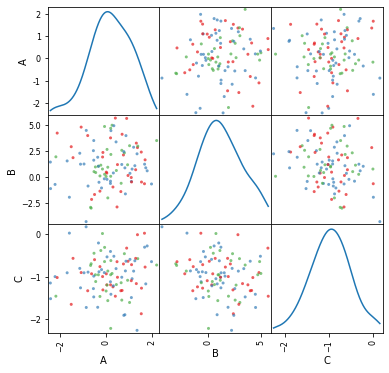

In [7]:
import pandas as pd


stuff = pd.plotting.scatter_matrix(pdf, alpha=0.7, figsize=(6, 6), diagonal='kde', color=pdf.col)

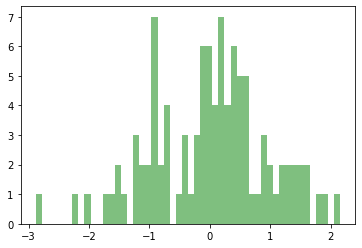

In [8]:
import random
import matplotlib.pyplot as plt

# create an RDD of 100 random numbers
x = [random.normalvariate(0,1) for i in range(100)]
rdd = sc.parallelize(x)

# plot data in RDD - use .collect() to bring data to local
num_bins = 50
n, bins, patches = plt.hist(rdd.collect(), num_bins, facecolor='green', alpha=0.5)